In [29]:
import pandas as pd
import numpy as np

import pandas.io.data as pdweb
import datetime

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [61]:
stockData = pdweb.get_data_yahoo('BP',
                                 start= datetime.datetime(2015,12,1),
                                 end= datetime.datetime(2016,6,30))['Adj Close']
stockData.head()

Date
2015-12-01    32.822437
2015-12-02    31.925649
2015-12-03    31.397014
2015-12-04    30.840062
2015-12-07    29.509042
Name: Adj Close, dtype: float64

In [62]:
stockReturns = stockData.pct_change().dropna()

(0, 1)

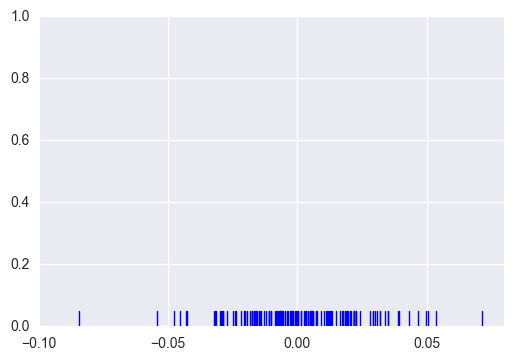

In [63]:
sns.rugplot(stockReturns.values)
plt.ylim(0,1)

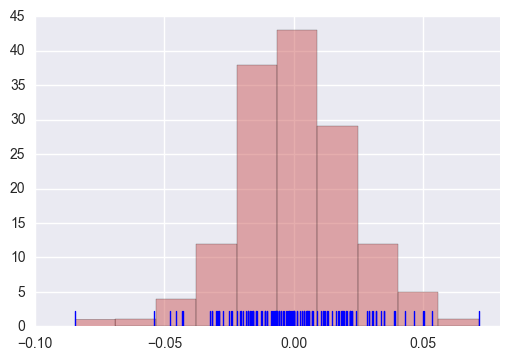

In [64]:
plt.hist(stockReturns.values, alpha=0.5, color='indianred')
sns.rugplot(stockReturns.values)

(0, 1)

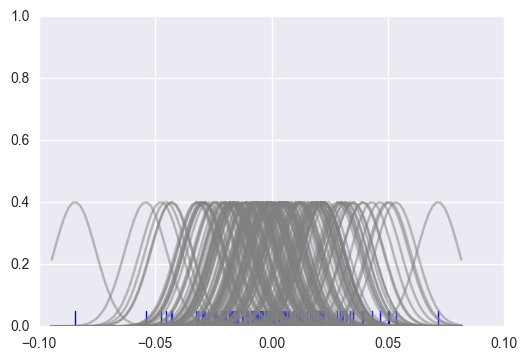

In [65]:
sns.rugplot(stockReturns);

x_min = stockReturns.min() -0.01
x_max = stockReturns.max() +0.01

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*stockReturns.std()**5)/(3*len(stockReturns)))**.2

kernel_list = []

for point in stockReturns:
    kernel = stats.norm(point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0,1)

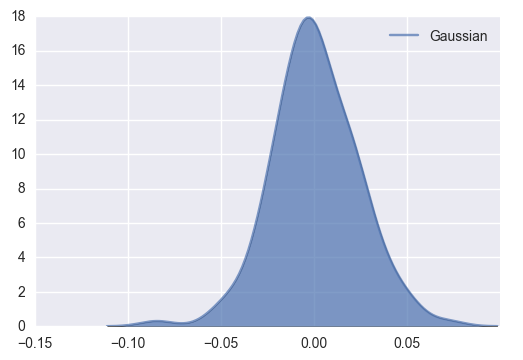

In [70]:
# One step
sns.kdeplot(stockReturns, label='Gaussian', shade =True, alpha=0.7)

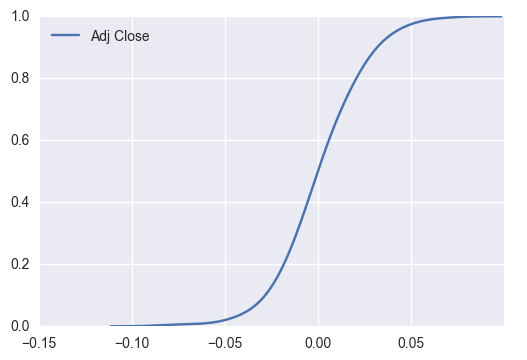

In [71]:
sns.kdeplot(stockReturns, cumulative=True)

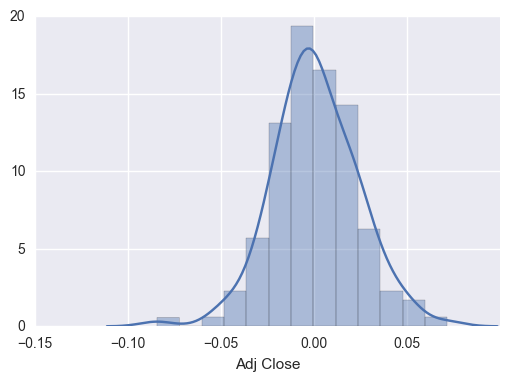

In [72]:
sns.distplot(stockReturns)